In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [56]:
# Define the list of stock tickers and their corresponding weights in the portfolio

assets = ['ULTRACEMCO.NS','BAJFINANCE.NS','BAJAJ-AUTO.NS','TCS.NS','BRITANNIA.NS']

In [57]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [58]:
# Define the start date for collecting historical stock data

from datetime import datetime
stockStartDate = datetime(2013,1,1)

In [59]:
# Get today's date

today = datetime.today().strftime('%Y-%m-%d')
today

'2023-12-24'

In [60]:
# Import historical stock data using Yahoo Finance API

import yfinance as yf
df = pd.DataFrame()
for stock in assets:
    try:
        data = yf.download(stock, start=stockStartDate, end=today) # Download adjusted close prices for each stock in the portfolio
        df[stock] = data['Adj Close'].values
    except KeyError:
        print(f"No data found for {stock}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [61]:
# Display the dataframe containing adjusted close prices

df

,ULTRACEMCO.NS,BAJFINANCE.NS,BAJAJ-AUTO.NS,TCS.NS,BRITANNIA.NS
0,1943.373535,126.483391,1535.420288,504.760284,216.621979
1,1955.334595,125.093605,1586.087158,504.421021,217.896591
2,1945.343018,128.461517,1595.198120,511.328552,219.365662
3,1961.723633,128.521729,1588.500122,518.755493,220.445831
4,1960.570557,128.331787,1582.233765,517.018494,216.816406
...,...,...,...,...,...
2704,9970.349609,7587.600098,6465.700195,3859.199951,4879.500000
2705,10017.099609,7632.649902,6419.000000,3816.199951,4911.250000
2706,9887.450195,7493.950195,6364.450195,3780.050049,4954.950195
2707,9954.450195,7367.149902,6246.350098,3787.500000,5059.600098


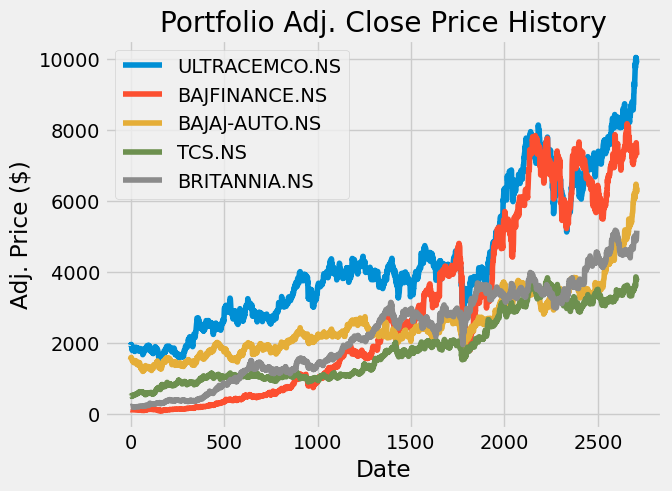

In [62]:
# Plot the adjusted close prices of each stock in the portfolio

for c in df.columns.values:
    plt.plot(df[c],label=c)

plt.title("Portfolio Adj. Close Price History")
plt.xlabel("Date")
plt.ylabel("Adj. Price ($)")
plt.legend(df.columns.values,loc='upper left')
plt.show()

In [63]:
# Calculate daily returns of the portfolio

returns = df.pct_change()
print(returns)

      ULTRACEMCO.NS  BAJFINANCE.NS  BAJAJ-AUTO.NS    TCS.NS  BRITANNIA.NS
0               NaN            NaN            NaN       NaN           NaN
1          0.006155      -0.010988       0.032999 -0.000672      0.005884
2         -0.005110       0.026923       0.005744  0.013694      0.006742
3          0.008420       0.000469      -0.004199  0.014525      0.004924
4         -0.000588      -0.001478      -0.003945 -0.003348     -0.016464
...             ...            ...            ...       ...           ...
2704      -0.005893       0.009654       0.030358 -0.000466     -0.007001
2705       0.004689       0.005937      -0.007223 -0.011142      0.006507
2706      -0.012943      -0.018172      -0.008498 -0.009473      0.008898
2707       0.006776      -0.016920      -0.018556  0.001971      0.021120
2708       0.001462      -0.009753       0.020132  0.009637      0.020061

[2709 rows x 5 columns]


In [64]:
# Calculate the annual covariance matrix of stock returns

annual_cov_matrics = returns.cov() * 252
annual_cov_matrics

,ULTRACEMCO.NS,BAJFINANCE.NS,BAJAJ-AUTO.NS,TCS.NS,BRITANNIA.NS
ULTRACEMCO.NS,0.076648,0.037907,0.024115,0.014027,0.020215
BAJFINANCE.NS,0.037907,0.136521,0.029771,0.015372,0.026514
BAJAJ-AUTO.NS,0.024115,0.029771,0.063732,0.013174,0.016377
TCS.NS,0.014027,0.015372,0.013174,0.058401,0.011463
BRITANNIA.NS,0.020215,0.026514,0.016377,0.011463,0.067375


In [65]:
# Calculate the portfolio variance

port_variance = np.dot(weights.T,np.dot(annual_cov_matrics,weights))
port_variance

0.03282199503638647

In [66]:
# Calculate the portfolio volatility

port_volatility = np.sqrt(port_variance)
port_volatility

0.18116841622199623

In [67]:
# Calculate the annualized portfolio return

portAnnualReturn = np.sum(returns.mean() * weights) * 252
portAnnualReturn

0.2694449447742095

In [68]:
# Display portfolio risk and return metrics

percent_var = str(round(port_variance,2)*100)+'%'
percent_vols = str(round(port_volatility,2)*100)+"%"
percent_ret = str(round(portAnnualReturn,2)*100)+"%"

print("Expected Annual Return : ",percent_ret)
print("Annual Volatility/Risk : ",percent_vols)
print("Annual Variance : ",percent_var)


Expected Annual Return :  27.0%
Annual Volatility/Risk :  18.0%
Annual Variance :  3.0%


In [69]:
# Use the pypfopt library for portfolio optimization

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [70]:
# Calculate expected returns and covariance matrix for the optimization

mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

In [71]:
# Create an EfficientFrontier object

ef = EfficientFrontier(mu,s)

# Optimize for maximum Sharpe ratio to find optimal portfolio weights

weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# Display portfolio performance metrics

ef.portfolio_performance(verbose=True)


OrderedDict([('ULTRACEMCO.NS', 0.0), ('BAJFINANCE.NS', 0.29647), ('BAJAJ-AUTO.NS', 0.0), ('TCS.NS', 0.24465), ('BRITANNIA.NS', 0.45888)])
Expected annual return: 34.4%
Annual volatility: 20.4%
Sharpe Ratio: 1.59


(0.3441242294026213, 0.20420616048748166, 1.5872402117001307)

In [72]:
# Perform discrete allocation of funds based on optimized weights

from pypfopt.discrete_allocation import DiscreteAllocation , get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 100000)

# Get the discrete allocation and remaining funds

allocation,leftover = da.lp_portfolio()
print("Discrete Allocation : ",allocation)
print("Funds Remaining : ₹{:.2f}".format(leftover))


Discrete Allocation :  {'BAJFINANCE.NS': 4, 'TCS.NS': 6, 'BRITANNIA.NS': 9}
Funds Remaining : ₹1424.90


C:\Users\hp\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
